<a href="https://colab.research.google.com/github/mha142/my_pytorch_tutorials/blob/main/test_our_model_run_enocde_image_to_get_latent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np

# Create a sample NumPy array (grayscale image)
image_array = np.random.rand(256, 256) * 255  # Random values scaled to [0, 255]

# Convert to uint8 and create a Pillow Image
image = Image.fromarray(np.uint8(image_array))

# Save the image
image.save("random_image.png")

In [3]:
os.chdir('/content/drive/My Drive/Colab Notebooks/')

#test the loaded model

In [4]:
from interfacegan.models.stylegan_generator import StyleGANGenerator
from models.latent_optimizer import PostSynthesisProcessing
from models.image_to_latent import ImageToLatent, ImageLatentDataset
from models.losses import LogCoshLoss
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from glob import glob
from tqdm import tqdm_notebook as tqdm
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import DataLoader

class LatentCodeDataset(Dataset):
    def __init__(self, image_dir, latent_dir, transform=None):
        self.image_dir = image_dir
        self.latent_dir = latent_dir
        self.image_files = sorted(os.listdir(image_dir))
        self.latent_files = sorted(os.listdir(latent_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Load latent code
        latent_path = os.path.join(self.latent_dir, self.latent_files[idx])
        latent_code = np.load(latent_path)
        latent_code = torch.tensor(latent_code, dtype=torch.float32)

        return image, latent_code



def normalized_to_normal_image(image):
    mean=torch.tensor([0.485, 0.456, 0.406]).view(-1,1,1).float()
    std=torch.tensor([0.229, 0.224, 0.225]).view(-1,1,1).float()

    image = image.detach().cpu()

    image *= std
    image += mean
    image *= 255

    image = image.numpy()[0]
    image = np.transpose(image, (1,2,0))
    return image.astype(np.uint8)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Loading networks from "/content/drive/My Drive/Colab Notebooks/trained_gan_and_vae/stylegan2_ffhq.pkl"...
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/content/drive/MyDrive/Colab Notebooks/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab Notebooks/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/drive/MyDrive/Colab Notebooks/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1314, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1746, in _jit_compile
    return _import_module_from_library(name, build_directory, is_python_module)
  File "/usr/local/lib/python3.10/dist-packages/torch/

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/drive/MyDrive/Colab Notebooks/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab Notebooks/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/drive/MyDrive/Colab Notebooks/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1314, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1746, in _jit_compile
    return _import_module_from_library(name, build_directory, is_python_module)
  File "/usr/local/lib/python3.10/dist-packages/torch/

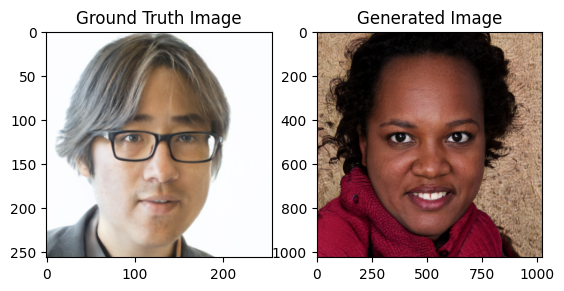

In [13]:
test_image_dir = "/content/drive/My Drive/Colab Notebooks/ready_generated_data/test/images"
test_latent_dir = "/content/drive/My Drive/Colab Notebooks/ready_generated_data/test/latent_codes"

augments = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_dataset = LatentCodeDataset(test_image_dir, test_latent_dir, transform=augments) #transform=transform
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_test_images = 5
images = [test_dataset[i][0].unsqueeze(0).cuda() for i in range(num_test_images)] #with gpu

normal_images = list(map(normalized_to_normal_image, images))

image_size = 256
#load our trained model
image_to_latent = ImageToLatent(image_size).cuda()
#image_to_latent.load_state_dict(torch.load("image_to_latent.pt"))
filename = '/content/drive/My Drive/Colab Notebooks/sgan_image_to_latent_model_and_optimizer_epoch_23.pt' #//
checkpoint = torch.load(filename) #with gpu
image_to_latent.load_state_dict(checkpoint['model'])
#optimizer.load_state_dict(checkpoint['optimizer'])

import legacy

#load the stylegan2 model
network_pkl = '/content/drive/My Drive/Colab Notebooks/trained_gan_and_vae/stylegan2_ffhq.pkl'

# Load the model
print(f'Loading networks from "{network_pkl}"...')
with open(network_pkl, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # Load the generator
    G = G.float().to(device)

def save_image(passed_img, path):
      # Save the image using PIL
      image = Image.fromarray(passed_img, 'RGB')  # Convert to PIL Image
      #image_path = os.path.join('', f'generated_image.png')
      image_path = path
      image.save(image_path)  # Save as PNG
      #print("Image saved as 'generated_image.png'")

#image_to_latent.eval()
for i, (images, latents) in enumerate(test_loader, 1):
  with torch.no_grad():
      images, latents = images.cuda(), latents.cuda()
      GT_image = normalized_to_normal_image(images)

      pred_latents = image_to_latent(images)
      # Save the latents
      np.save('/content/drive/My Drive/Colab Notebooks/pred_latents.npy', pred_latents.cpu())

      #pass the pred latent to stylegan model
      img = G(pred_latents.squeeze(), None)  # Pass latent vector to the generator
      # Convert FP16 to FP32
      img = img.float()
      img = (img + 1) * 127.5  # Convert from [-1, 1] to [0, 255]
      img = img.clamp(0, 255).to(torch.uint8)  # Ensure valid pixel range
      img = img.permute(0, 2, 3, 1)[0].cpu().numpy()  # Convert to HWC format

      plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
      plt.imshow(GT_image)
      plt.title("Ground Truth Image")
      save_image(GT_image, '/content/drive/My Drive/Colab Notebooks/ground_truth_image.png')

      plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
      plt.imshow(img)
      plt.title("Generated Image")
      save_image(img, '/content/drive/My Drive/Colab Notebooks/generated_image.png')


      plt.show()
      break






#predict with the model

# pred_dlatents = map(image_to_latent, images)

# synthesizer = StyleGANGenerator("stylegan_ffhq").model.synthesis
# post_processing = PostSynthesisProcessing()
# post_process = lambda image: post_processing(image).detach().cpu().numpy().astype(np.uint8)[0]

# pred_images = map(synthesizer, pred_dlatents)
# pred_images = map(post_process, pred_images)
# pred_images = list(map(lambda image: np.transpose(image, (1,2,0)), pred_images))


# figure = plt.figure(figsize=(25,10))
# columns = len(normal_images)
# rows = 2

# axis = []

# for i in range(columns):
#     axis.append(figure.add_subplot(rows, columns, i + 1))
#     axis[-1].set_title("Reference Image")
#     plt.imshow(normal_images[i])

# for i in range(columns, columns*rows):
#     axis.append(figure.add_subplot(rows, columns, i + 1))
#     axis[-1].set_title("Generated With Predicted Latents")
#     plt.imshow(pred_images[i - columns])

# plt.show()


(1, 18, 512)
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/drive/MyDrive/Colab Notebooks/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab Notebooks/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/drive/MyDrive/Colab Notebooks/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1314, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1746, in _jit_compile
    return _import_module_from_library(name, build_directory, is_python_module)
  File "/usr/local/lib/python3.10/dist-packages/torch/

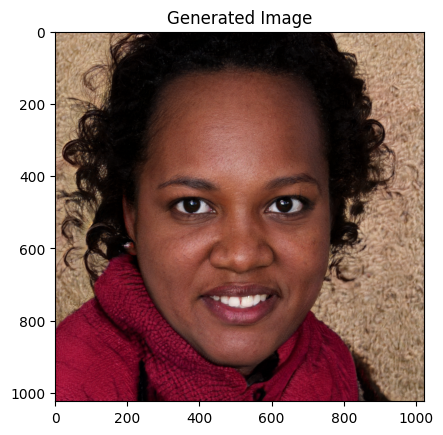

In [18]:
#load the save numpy array
loaded_array = np.load('pred_latents.npy', allow_pickle=True)
print(loaded_array.shape)

#convert the NumPy array to a PyTorch tensor
latent_tensor = torch.tensor(loaded_array).cuda()  # Move to GPU if required

#generate an image with the predicted tensor
img = G(latent_tensor.squeeze(), None)  # Pass latent vector to the generator
# Convert FP16 to FP32
img = img.float()
img = (img + 1) * 127.5  # Convert from [-1, 1] to [0, 255]
img = img.clamp(0, 255).to(torch.uint8)  # Ensure valid pixel range
img = img.permute(0, 2, 3, 1)[0].cpu().numpy()  # Convert to HWC format
plt.imshow(img)
plt.title("Generated Image")
plt.show()

In [ ]:
#TO DO :


#run encode image
with
gt_image and pridected latent =from our model

In [ ]:

#Change the path to your desired directory in Drive
os.chdir('/content/drive/My Drive/Colab Notebooks/')
!git clone https://github.com/genforce/interfacegan.git
!ls "/content/drive/My Drive/Colab Notebooks/interfacegan"

Cloning into 'interfacegan'...
remote: Enumerating objects: 613, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 613 (delta 94), reused 91 (delta 91), pack-reused 489 (from 1)
Receiving objects: 100% (613/613), 13.72 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (204/204), done.
Updating files: 100% (122/122), done.
